In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import shuffle
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier

# Turn off the warnings.
warnings.filterwarnings(action='ignore')
%matplotlib inline

------
## Reading Data

In [4]:
Trained_Data = pd.read_csv("/content/drive/MyDrive/DNN-EdgeIIoT-dataset.csv" , low_memory=False)

---------
## Exploring Data

In [5]:
Trained_Data

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 11:44:10.081753000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,2021 11:44:10.162218000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0,Normal
2,2021 11:44:10.162271000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,2021 11:44:10.162641000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,2021 11:44:10.166132000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219196,2021 23:24:32.816050000,166.75.162.225,192.168.0.128,0,0.0,0.0,0,31814.0,45620.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219197,2021 23:24:32.816595000,70.162.34.183,192.168.0.128,0,0.0,0.0,0,27718.0,45636.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219198,2021 23:24:32.818043000,40.13.95.244,192.168.0.128,0,0.0,0.0,0,18502.0,45672.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
2219199,2021 23:24:32.820831000,18.132.75.125,192.168.0.128,0,0.0,0.0,0,1862.0,45737.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP


from matplotlib import pyplot as plt
Trained_Data['arp.opcode'].plot(kind='hist', bins=20, title='arp.opcode')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Trained_Data['arp.hw.size'].plot(kind='hist', bins=20, title='arp.hw.size')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Trained_Data['icmp.checksum'].plot(kind='hist', bins=20, title='icmp.checksum')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Trained_Data['icmp.seq_le'].plot(kind='hist', bins=20, title='icmp.seq_le')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
Trained_Data.groupby('Attack_type_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Trained_Data.plot(kind='scatter', x='arp.opcode', y='arp.hw.size', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Trained_Data.plot(kind='scatter', x='arp.hw.size', y='icmp.checksum', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Trained_Data.plot(kind='scatter', x='icmp.checksum', y='icmp.seq_le', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Trained_Data.plot(kind='scatter', x='icmp.seq_le', y='http.content_length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Attack_label']
  ys = series['arp.opcode']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Trained_Data.sort_values('Attack_label', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Attack_type_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Attack_type_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Attack_label')
_ = plt.ylabel('arp.opcode')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Attack_label']
  ys = series['arp.hw.size']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Trained_Data.sort_values('Attack_label', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Attack_type_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Attack_type_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Attack_label')
_ = plt.ylabel('arp.hw.size')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Attack_label']
  ys = series['icmp.checksum']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Trained_Data.sort_values('Attack_label', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Attack_type_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Attack_type_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Attack_label')
_ = plt.ylabel('icmp.checksum')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Attack_label']
  ys = series['icmp.seq_le']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Trained_Data.sort_values('Attack_label', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Attack_type_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Attack_type_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Attack_label')
_ = plt.ylabel('icmp.seq_le')

from matplotlib import pyplot as plt
Trained_Data['arp.opcode'].plot(kind='line', figsize=(8, 4), title='arp.opcode')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
Trained_Data['arp.hw.size'].plot(kind='line', figsize=(8, 4), title='arp.hw.size')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
Trained_Data['icmp.checksum'].plot(kind='line', figsize=(8, 4), title='icmp.checksum')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
Trained_Data['icmp.seq_le'].plot(kind='line', figsize=(8, 4), title='icmp.seq_le')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(Trained_Data['Attack_type_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(Trained_Data, x='arp.opcode', y='Attack_type_name', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(Trained_Data['Attack_type_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(Trained_Data, x='arp.hw.size', y='Attack_type_name', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(Trained_Data['Attack_type_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(Trained_Data, x='icmp.checksum', y='Attack_type_name', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(Trained_Data['Attack_type_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(Trained_Data, x='icmp.seq_le', y='Attack_type_name', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

---------
## Columns Modification

In [6]:
Columns = (['frame.time', 'ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4',
       'arp.opcode', 'arp.hw.size', 'arp.src.proto_ipv4', 'icmp.checksum',
       'icmp.seq_le', 'icmp.transmit_timestamp', 'icmp.unused',
       'http.file_data', 'http.content_length', 'http.request.uri.query',
       'http.request.method', 'http.referer', 'http.request.full_uri',
       'http.request.version', 'http.response', 'http.tls_port', 'tcp.ack',
       'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin',
       'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack',
       'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.options',
       'tcp.payload', 'tcp.seq', 'tcp.srcport', 'udp.port', 'udp.stream',
       'udp.time_delta', 'dns.qry.name', 'dns.qry.name.len', 'dns.qry.qu',
       'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request',
       'dns.retransmit_request_in', 'mqtt.conack.flags',
       'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len',
       'mqtt.msg_decoded_as', 'mqtt.msg', 'mqtt.msgtype', 'mqtt.proto_len',
       'mqtt.protoname', 'mqtt.topic', 'mqtt.topic_len', 'mqtt.ver',
       'mbtcp.len', 'mbtcp.trans_id', 'mbtcp.unit_id', 'Attack_label',
       'Attack_type'])



In [7]:
Trained_Data.columns = Columns

In [8]:
Trained_Data.head(10)

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 11:44:10.081753000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,2021 11:44:10.162218000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0,Normal
2,2021 11:44:10.162271000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,2021 11:44:10.162641000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,2021 11:44:10.166132000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,0,Normal
5,2021 11:44:10.166159000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
6,2021 11:44:10.166968000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
7,2021 11:44:10.167072000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
8,2021 11:44:10.169612000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
9,2021 11:44:10.169644000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal


-------
## Data Description

In [9]:
Trained_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219201 entries, 0 to 2219200
Data columns (total 63 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   frame.time                 object 
 1   ip.src_host                object 
 2   ip.dst_host                object 
 3   arp.dst.proto_ipv4         object 
 4   arp.opcode                 float64
 5   arp.hw.size                float64
 6   arp.src.proto_ipv4         object 
 7   icmp.checksum              float64
 8   icmp.seq_le                float64
 9   icmp.transmit_timestamp    float64
 10  icmp.unused                float64
 11  http.file_data             object 
 12  http.content_length        float64
 13  http.request.uri.query     object 
 14  http.request.method        object 
 15  http.referer               object 
 16  http.request.full_uri      object 
 17  http.request.version       object 
 18  http.response              float64
 19  http.tls_port              float64
 20  tc

In [11]:
Trained_Data.describe()

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,...,mqtt.len,mqtt.msg_decoded_as,mqtt.msgtype,mqtt.proto_len,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label
count,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2219201.0,2.219201e+06,2.219201e+06,2219201.0,2.219201e+06,...,2.219201e+06,2219201.0,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06,2.219201e+06
mean,3.323268e-03,1.582732e-02,1.730285e+03,1.893064e+03,2.877556e+03,0.0,4.808231e+00,1.469132e-02,0.0,2.278400e+07,...,1.982731e+00,0.0,7.481643e-01,1.496665e-01,8.977934e-01,1.496665e-01,1.297764e-03,5.170780e-03,9.417804e-05,2.719709e-01
std,6.843237e-02,3.077555e-01,8.526581e+03,8.870474e+03,4.705188e+05,0.0,9.642259e+01,1.203142e-01,0.0,1.649033e+08,...,7.648797e+00,0.0,2.701086e+00,7.591219e-01,4.554231e+00,7.591219e-01,1.711483e-01,7.226807e-01,1.377313e-02,4.449751e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,1.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,6.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,5.900000e+01,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,2.000000e+00,6.000000e+00,6.553300e+04,6.553500e+04,7.728902e+07,0.0,8.365500e+04,1.000000e+00,0.0,3.949529e+09,...,3.900000e+01,0.0,1.400000e+01,4.000000e+00,2.400000e+01,4.000000e+00,2.700000e+01,1.510000e+02,6.000000e+00,1.000000e+00


-----
### Exploring Responses

In [ ]:
Results = set(Trained_Data['Attack_type'].values)
print(Results,end=" ")

{'DDoS_ICMP', 'Fingerprinting', 'MITM', 'Vulnerability_scanner', 'Port_Scanning', 'Uploading', 'SQL_injection', 'Backdoor', 'Ransomware', 'DDoS_TCP', 'XSS', 'DDoS_HTTP', 'Normal', 'DDoS_UDP', 'Password'} 

## Classifying The Attack Results

In [ ]:
#Trained_attack = Trained_Data.Attack_type.map(lambda a: 0 if a == 'normal' else 1)
#Tested_attack = Tested_Data.attack.map(lambda a: 0 if a == 'normal' else 1)


#Trained_Data['attack_state'] = Trained_attack
#Tested_Data['attack_state'] = Tested_attack

In [12]:
Trained_Data.head(10)

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 11:44:10.081753000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,2021 11:44:10.162218000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0,Normal
2,2021 11:44:10.162271000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,2021 11:44:10.162641000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,2021 11:44:10.166132000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,0,Normal
5,2021 11:44:10.166159000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
6,2021 11:44:10.166968000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
7,2021 11:44:10.167072000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
8,2021 11:44:10.169612000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
9,2021 11:44:10.169644000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal


--------
## Data preprocessing


In [13]:
drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4",
                "http.file_data","http.request.full_uri","icmp.transmit_timestamp",
                "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",
                "tcp.dstport", "udp.port", "mqtt.msg", "icmp.unused", "http.tls_port", 'dns.qry.type', 'dns.retransmit_request_in', "mqtt.msg_decoded_as", "mbtcp.trans_id", "mbtcp.unit_id", "http.request.method", "http.referer", "http.request.version", "dns.qry.name.len", "mqtt.conack.flags", "mqtt.protoname", "mqtt.topic"]


Trained_Data.drop(drop_columns, axis=1, inplace=True)

### Chechking for Missing Data

In [14]:
Trained_Data.isnull().sum()

arp.opcode                0
arp.hw.size               0
icmp.checksum             0
icmp.seq_le               0
http.content_length       0
http.response             0
tcp.ack                   0
tcp.ack_raw               0
tcp.checksum              0
tcp.connection.fin        0
tcp.connection.rst        0
tcp.connection.syn        0
tcp.connection.synack     0
tcp.flags                 0
tcp.flags.ack             0
tcp.len                   0
tcp.seq                   0
udp.stream                0
udp.time_delta            0
dns.qry.name              0
dns.qry.qu                0
dns.retransmission        0
dns.retransmit_request    0
mqtt.conflag.cleansess    0
mqtt.conflags             0
mqtt.hdrflags             0
mqtt.len                  0
mqtt.msgtype              0
mqtt.proto_len            0
mqtt.topic_len            0
mqtt.ver                  0
mbtcp.len                 0
Attack_label              0
Attack_type               0
dtype: int64

-----
- **There is no missing data**

--------
### Checking for Duplicates

In [16]:
Trained_Data.duplicated().sum()

309530

In [17]:
Trained_Data.drop_duplicates(subset=None, keep="first", inplace=True)
Trained_Data.duplicated().sum()

0

---------
- **There is no duplicated data**

-------------
## Data Encoding

In [18]:
# Check for non-numeric columns
non_numeric_columns = Trained_Data.select_dtypes(exclude=['float64', 'int64']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['Attack_type'], dtype='object')


In [19]:
LE = LabelEncoder()
attack_LE= LabelEncoder()
Trained_Data['Attack_type'] = attack_LE.fit_transform(Trained_Data["Attack_type"])

----
## Data Splitting

In [20]:
X = Trained_Data.drop('Attack_type', axis = 1)
X = Trained_Data.drop('Attack_label', axis = 1)


Y= Trained_Data['Attack_label']


In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size= 0.25 , random_state=42)

---------
## Data Scaling

In [22]:
Ro_scaler = RobustScaler()
X_train = Ro_scaler.fit_transform(X_train)
X_test= Ro_scaler.transform(X_test)

In [23]:
X_train.shape, Y_train.shape

((1432253, 33), (1432253,))

In [24]:
X_test.shape, Y_test.shape

((477418, 33), (477418,))

------
## Working on Trained Data
### VIF

In [25]:
A = sm.add_constant(X_train.astype(float))
Est1 = sm.GLM(Y_train.astype(float), A)
Est2 = Est1.fit()
Est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Attack_label   No. Observations:              1432253
Model:                            GLM   Df Residuals:                  1432223
Model Family:                Gaussian   Df Model:                           29
Link Function:               Identity   Scale:                         0.11547
Method:                          IRLS   Log-Likelihood:            -4.8635e+05
Date:                Fri, 26 Jul 2024   Deviance:                   1.6538e+05
Time:                        16:55:24   Pearson chi2:                 1.65e+05
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5357
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1980      0.000    417.761      0.000       0.197       0.199
x1             0.0126      0.165      0.076      0.939      -0.311       0.336
x2             0.0755      0.044      1.705      0.088      -0.011       0.162
x3          8.304e-06   6.12e-08    135.624      0.000    8.18e-06    8.42e-06
x4          8.255e-06   5.97e-08    138.319      0.000    8.14e-06    8.37e-06
x5          2.178e-05   2.62e-06      8.301      0.000    1.66e-05    2.69e-05
x6             0.4569      0.003    173.405      0.000       0.452       0.462
x7           3.89e-08   2.21e-10    175.698      0.000    3.85e-08    3.93e-08
x8             0.0052      0.001      8.717      0.000       0.004       0.006
x9            -0.0463      0.001    -81.190      0.000      -0.047      -0.045
x10            0.0026      0.001      2.079      0.038       0.000       0.005
x11            0.0276      0.002     16.172      0.000       0.024       0.031
x12            0.0441      0.002     20.857      0.000       0.040       0.048
x13           -0.1351      0.001   -100.473      0.000      -0.138      -0.132
x14            0.3130      0.001    277.439      0.000       0.311       0.315
x15           -0.8021      0.003   -273.504      0.000      -0.808      -0.796
x16           -0.0002   1.07e-05    -18.483      0.000      -0.000      -0.000
x17        -1.093e-07   5.59e-10   -195.670      0.000    -1.1e-07   -1.08e-07
x18         3.184e-07    1.1e-09    290.572      0.000    3.16e-07    3.21e-07
x19           -0.0009   3.18e-05    -28.546      0.000      -0.001      -0.001
x20         1.713e-07   2.45e-09     70.030      0.000    1.66e-07    1.76e-07
x21            0.0010    4.2e-05     24.386      0.000       0.001       0.001
x22           -0.0034      0.001     -5.366      0.000      -0.005      -0.002
x23           -0.3686      0.060     -6.185      0.000      -0.485      -0.252
x24            0.0569      0.000    219.398      0.000       0.056       0.057
x25            0.1138      0.001    219.398      0.000       0.113       0.115
x26           -0.0024   9.48e-06   -257.658      0.000      -0.002      -0.002
x27           -0.2144      0.001   -256.132      0.000      -0.216      -0.213
x28           -0.0002   5.92e-07   -257.658      0.000      -0.000      -0.000
x29            0.2275      0.001    219.398      0.000       0.226       0.230
x30            0.3322      0.001    248.043      0.000       0.330       0.335
x31            0.2275      0.001    219.398      0.000       0.226       0.230
x32           -0.0224      0.002    -14.360      0.000      -0.025      -0.019
x33            0.0073      0.000     51.002      0.000       0.007       0.008
==============================================================================
"""

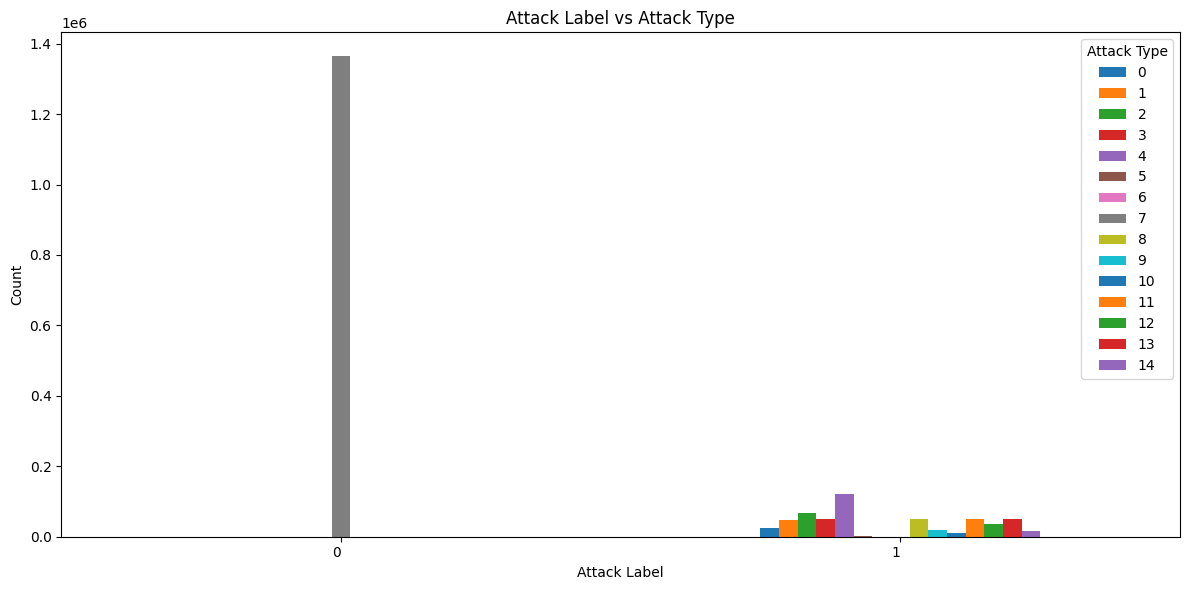

In [37]:
import matplotlib.pyplot as plt

# Count the occurrences of each attack type for each attack label
attack_counts = Trained_Data.groupby(['Attack_label', 'Attack_type']).size().unstack(fill_value=0)

# Plot the counts
attack_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Attack Label vs Attack Type')
plt.xlabel('Attack Label')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='right')
plt.legend(title='Attack Type')
plt.tight_layout()
plt.show()


--------
### Data Modeling

#### Evaluating Function

In [26]:
def Evaluate(Model_Name, Model_Abb, X_test, Y_test):

    Pred_Value= Model_Abb.predict(X_test)
    Accuracy = metrics.accuracy_score(Y_test,Pred_Value)
    Sensitivity = metrics.recall_score(Y_test,Pred_Value)
    Precision = metrics.precision_score(Y_test,Pred_Value)
    F1_score = metrics.f1_score(Y_test,Pred_Value)
    Recall = metrics.recall_score(Y_test,Pred_Value)

    print('--------------------------------------------------\n')
    print('The {} Model Accuracy   = {}\n'.format(Model_Name, np.round(Accuracy,3)))
    print('The {} Model Sensitvity = {}\n'.format(Model_Name, np.round(Sensitivity,3)))
    print('The {} Model Precision  = {}\n'.format(Model_Name, np.round(Precision,3)))
    print('The {} Model F1 Score   = {}\n'.format(Model_Name, np.round(F1_score,3)))
    print('The {} Model Recall     = {}\n'.format(Model_Name, np.round(Recall,3)))
    print('--------------------------------------------------\n')

    Confusion_Matrix = metrics.confusion_matrix(Y_test, Pred_Value)
    plot_confusion_matrix(Confusion_Matrix,class_names=['Normal', 'Attack'],figsize=(5.55,5), colorbar= "blue")
    RocCurveDisplay.from_estimator(Model_Abb, X_test, Y_test)

#### Grid Search Function

In [ ]:
def GridSearch(Model_Abb, Parameters, X_train, Y_train):
    Grid = GridSearchCV(estimator=Model_Abb, param_grid= Parameters, cv = 3, n_jobs=-1)
    Grid_Result = Grid.fit(X_train, Y_train)
    Model_Name = Grid_Result.best_estimator_

    return (Model_Name)

#### Logistic Regression

In [ ]:
LR= LogisticRegression()
LR.fit(X_train , Y_train)

LogisticRegression()

In [ ]:
LR.score(X_train, Y_train), LR.score(X_test, Y_test)

(0.8958273103979956, 0.8945044547819916)

--------------------------------------------------

The Logistic Regression Model Accuracy   = 0.895

The Logistic Regression Model Sensitvity = 0.997

The Logistic Regression Model Precision  = 0.891

The Logistic Regression Model F1 Score   = 0.941

The Logistic Regression Model Recall     = 0.997

--------------------------------------------------



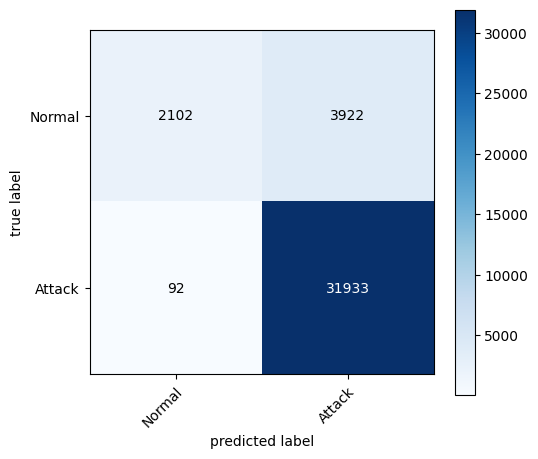

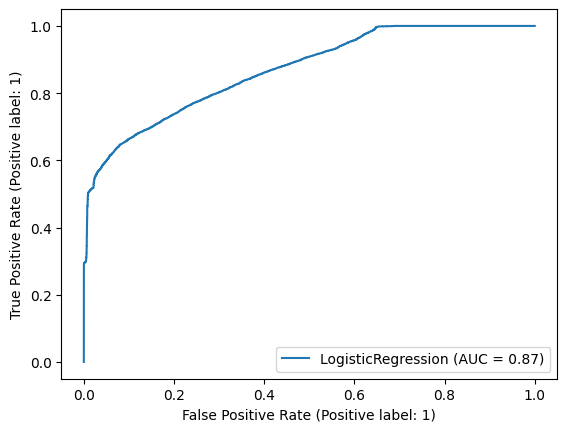

In [ ]:
Evaluate('Logistic Regression', LR, X_test, Y_test)

#### Decision Tree Classifier

In [ ]:
DT =DecisionTreeClassifier(max_features=6, max_depth=4)
DT.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4, max_features=6)

In [ ]:
DT.score(X_train, Y_train), DT.score(X_test, Y_test)

(0.9198402060500933, 0.9221792951194512)

--------------------------------------------------

The Decision Tree Classifier Model Accuracy   = 0.922

The Decision Tree Classifier Model Sensitvity = 0.948

The Decision Tree Classifier Model Precision  = 0.959

The Decision Tree Classifier Model F1 Score   = 0.954

The Decision Tree Classifier Model Recall     = 0.948

--------------------------------------------------



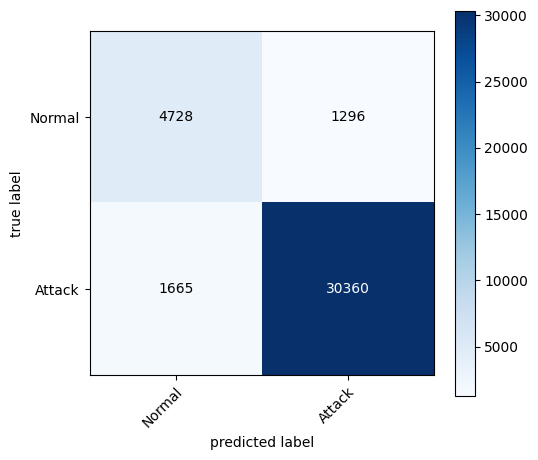

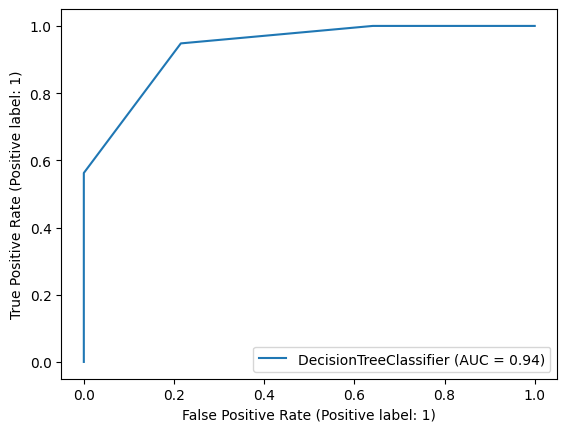

In [ ]:
Evaluate('Decision Tree Classifier', DT, X_test, Y_test)

#### Random Forest Classifier

In [ ]:
max_depth= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Parameters={ 'max_depth': max_depth}

In [ ]:
RF= RandomForestClassifier()
GridSearch(RF, Parameters, X_train, Y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
RF.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
RF.score(X_train, Y_train), RF.score(X_test, Y_test)

(1.0, 1.0)

--------------------------------------------------

The Random Forest Classifier Model Accuracy   = 1.0

The Random Forest Classifier Model Sensitvity = 1.0

The Random Forest Classifier Model Precision  = 1.0

The Random Forest Classifier Model F1 Score   = 1.0

The Random Forest Classifier Model Recall     = 1.0

--------------------------------------------------



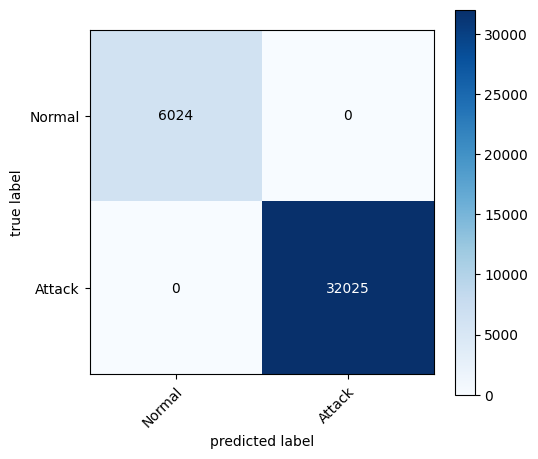

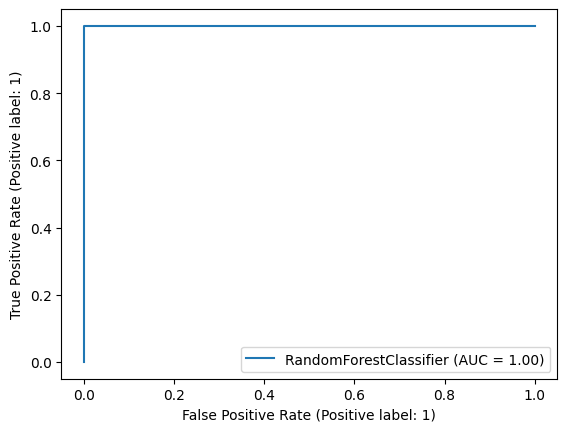

In [ ]:
Evaluate('Random Forest Classifier', RF, X_test, Y_test)

#### KNN-Model

In [ ]:
KNN= KNeighborsClassifier(n_neighbors=6)
KNN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
KNN.score(X_train, Y_train), KNN.score(X_test, Y_test)

(0.998212830823412, 0.9974769376330521)

--------------------------------------------------

The KNN Model Accuracy   = 0.997

The KNN Model Sensitvity = 0.998

The KNN Model Precision  = 0.999

The KNN Model F1 Score   = 0.999

The KNN Model Recall     = 0.998

--------------------------------------------------



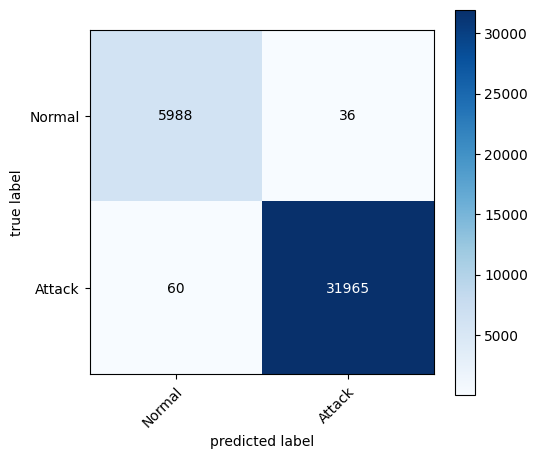

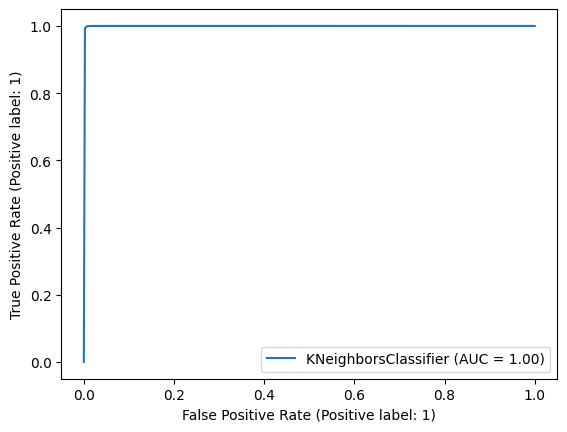

In [ ]:
Evaluate('KNN', KNN, X_test, Y_test)

----------------
## SVM Classifier

### 1st Kernel

In [ ]:
Linear_SVC = svm.LinearSVC(C=1)
Linear_SVC.fit(X_train, Y_train)

LinearSVC(C=1)

In [ ]:
Linear_SVC.score(X_train, Y_train), Linear_SVC.score(X_test, Y_test)

(0.8627822018975532, 0.8603117033299167)

--------------------------------------------------

The SVM Linear SVC Kernel Model Accuracy   = 0.86

The SVM Linear SVC Kernel Model Sensitvity = 0.965

The SVM Linear SVC Kernel Model Precision  = 0.88

The SVM Linear SVC Kernel Model F1 Score   = 0.921

The SVM Linear SVC Kernel Model Recall     = 0.965

--------------------------------------------------



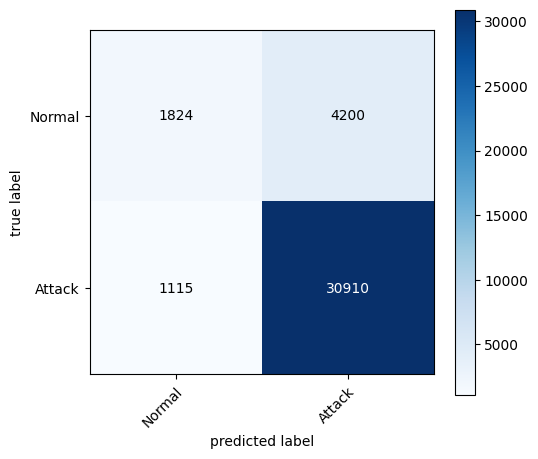

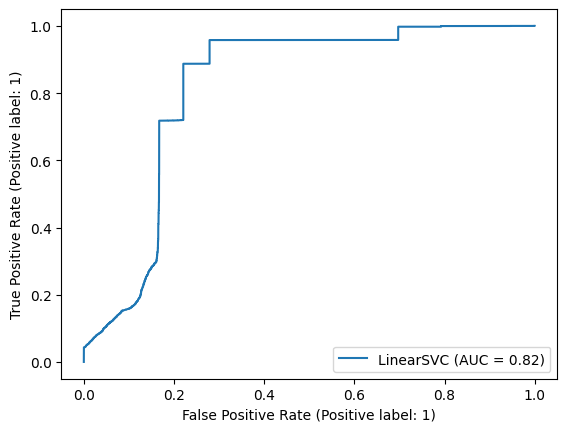

In [ ]:
Evaluate('SVM Linear SVC Kernel', Linear_SVC, X_test, Y_test)

----------------
## Gradient Boosting Classifier

In [ ]:
# Instantiate and fit the Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(X_train, Y_train)


GradientBoostingClassifier()

In [ ]:
# Print the training and testing scores
print("Gradient Boosting Classifier Training Score:", GB.score(X_train, Y_train))
print("Gradient Boosting Classifier Testing Score:", GB.score(X_test, Y_test))

Gradient Boosting Classifier Training Score: 1.0
Gradient Boosting Classifier Testing Score: 1.0


--------------------------------------------------

The Gradient Boosting Classifier Model Accuracy   = 1.0

The Gradient Boosting Classifier Model Sensitvity = 1.0

The Gradient Boosting Classifier Model Precision  = 1.0

The Gradient Boosting Classifier Model F1 Score   = 1.0

The Gradient Boosting Classifier Model Recall     = 1.0

--------------------------------------------------



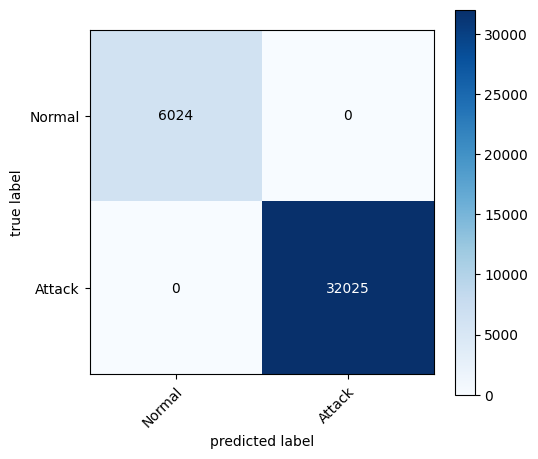

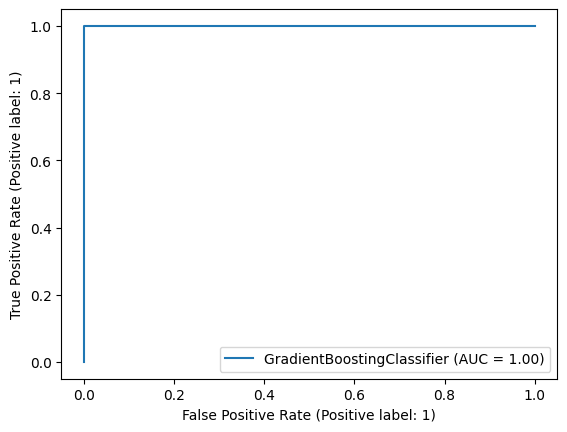

In [ ]:
# Evaluate the Gradient Boosting Classifier
Evaluate('Gradient Boosting Classifier', GB, X_test, Y_test)

## Extreme Gradient Boosting (XGBoost) Classifier

In [ ]:
# Instantiate and fit the XGBoost Classifier
XGB = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, random_state=42)
XGB.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Print the training and testing scores
print("XGBoost Classifier Training Score:", XGB.score(X_train, Y_train))
print("XGBoost Classifier Testing Score:", XGB.score(X_test, Y_test))

XGBoost Classifier Training Score: 1.0
XGBoost Classifier Testing Score: 1.0


--------------------------------------------------

The XGBoost Classifier Model Accuracy   = 1.0

The XGBoost Classifier Model Sensitvity = 1.0

The XGBoost Classifier Model Precision  = 1.0

The XGBoost Classifier Model F1 Score   = 1.0

The XGBoost Classifier Model Recall     = 1.0

--------------------------------------------------



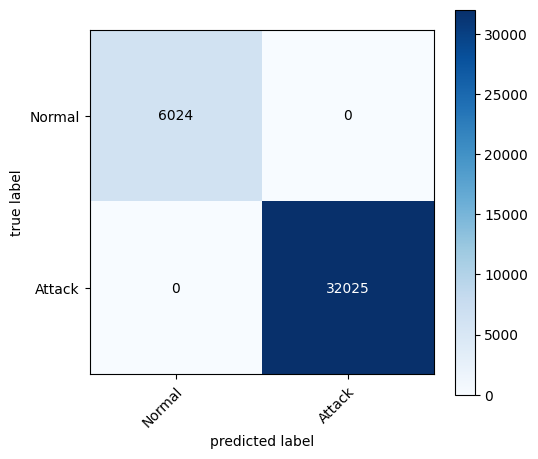

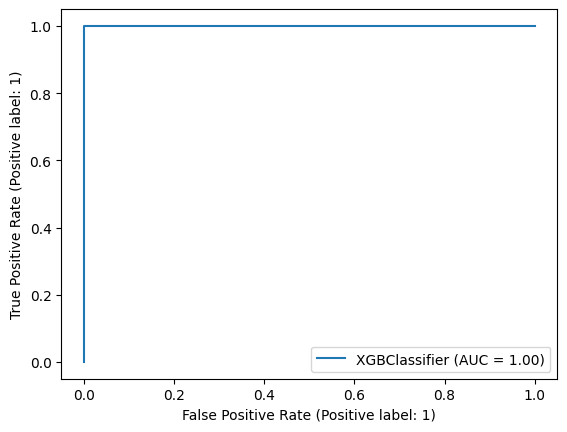

In [ ]:
# Evaluate the XGBoost Classifier
Evaluate('XGBoost Classifier', XGB, X_test, Y_test)

## Light Gradient Boosting Machine (LGBM) Classifier

In [ ]:
# Instantiate and fit the LGBM Classifier
LGBM = lgb.LGBMClassifier()
LGBM.fit(X_train, Y_train)

[LightGBM] [Info] Number of positive: 96070, number of negative: 18077
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2434
[LightGBM] [Info] Number of data points in the train set: 114147, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.841634 -> initscore=1.670437
[LightGBM] [Info] Start training from score 1.670437
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

LGBMClassifier()

In [ ]:
# Print the training and testing scores
print("LGBM Classifier Training Score:", LGBM.score(X_train, Y_train))
print("LGBM Classifier Testing Score:", LGBM.score(X_test, Y_test))

LGBM Classifier Training Score: 1.0
LGBM Classifier Testing Score: 1.0


--------------------------------------------------

The LGBM Classifier Model Accuracy   = 1.0

The LGBM Classifier Model Sensitvity = 1.0

The LGBM Classifier Model Precision  = 1.0

The LGBM Classifier Model F1 Score   = 1.0

The LGBM Classifier Model Recall     = 1.0

--------------------------------------------------



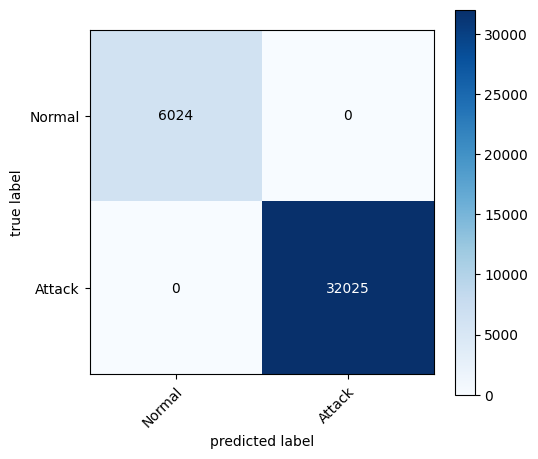

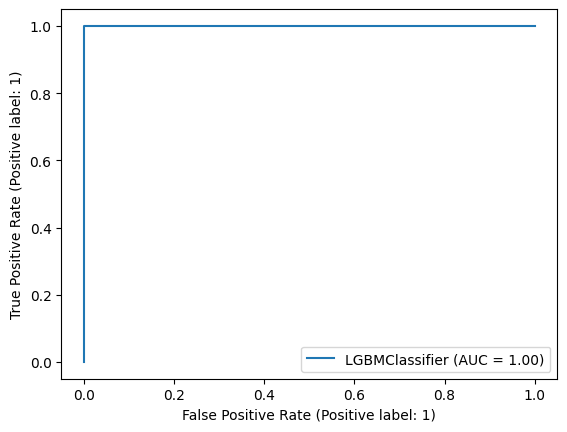

In [ ]:
# Evaluate the LGBM Classifier
Evaluate('LGBM Classifier', LGBM, X_test, Y_test)

## CatBoost Classifier

In [ ]:
# Instantiate and fit the CatBoost Classifier
CatBoost = CatBoostClassifier(learning_rate=0.1,depth=6,n_estimators=100,l2_leaf_reg=3,subsample=0.8,random_state=42)
CatBoost.fit(X_train, Y_train)

0:	learn: 0.3288633	total: 72.4ms	remaining: 7.17s
1:	learn: 0.1517159	total: 90.5ms	remaining: 4.43s
2:	learn: 0.0720641	total: 109ms	remaining: 3.52s
3:	learn: 0.0352027	total: 126ms	remaining: 3.02s
4:	learn: 0.0186469	total: 143ms	remaining: 2.72s
5:	learn: 0.0104987	total: 161ms	remaining: 2.53s
6:	learn: 0.0062306	total: 177ms	remaining: 2.36s
7:	learn: 0.0039567	total: 193ms	remaining: 2.23s
8:	learn: 0.0026505	total: 210ms	remaining: 2.12s
9:	learn: 0.0018934	total: 225ms	remaining: 2.02s
10:	learn: 0.0013364	total: 241ms	remaining: 1.95s
11:	learn: 0.0010015	total: 258ms	remaining: 1.89s
12:	learn: 0.0007646	total: 276ms	remaining: 1.85s
13:	learn: 0.0005961	total: 292ms	remaining: 1.8s
14:	learn: 0.0004777	total: 308ms	remaining: 1.75s
15:	learn: 0.0004037	total: 324ms	remaining: 1.7s
16:	learn: 0.0003407	total: 340ms	remaining: 1.66s
17:	learn: 0.0002883	total: 356ms	remaining: 1.62s
18:	learn: 0.0002519	total: 372ms	remaining: 1.58s
19:	learn: 0.0002252	total: 386ms	remaini

In [ ]:
# Print the training and testing scores
print("CatBoost Classifier Training Score:", CatBoost.score(X_train, Y_train))
print("CatBoost Classifier Testing Score:", CatBoost.score(X_test, Y_test))


CatBoost Classifier Training Score: 1.0
CatBoost Classifier Testing Score: 1.0


--------------------------------------------------

The CatBoost Classifier Model Accuracy   = 1.0

The CatBoost Classifier Model Sensitvity = 1.0

The CatBoost Classifier Model Precision  = 1.0

The CatBoost Classifier Model F1 Score   = 1.0

The CatBoost Classifier Model Recall     = 1.0

--------------------------------------------------



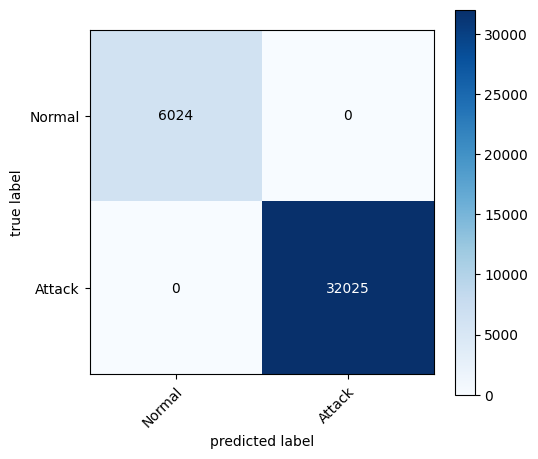

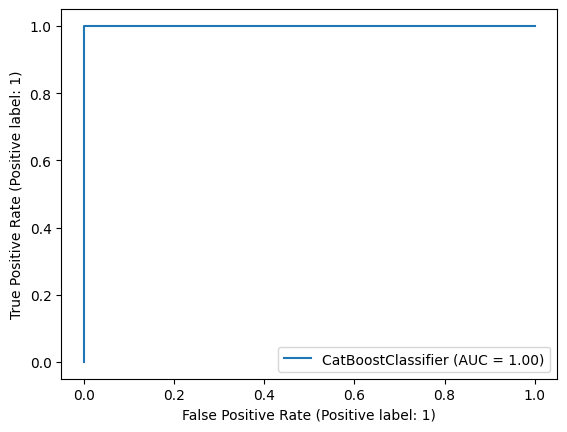

In [ ]:
# Evaluate the CatBoost Classifier
Evaluate('CatBoost Classifier', CatBoost, X_test, Y_test)

## Naive Bayes Classifier

In [ ]:
# Instantiate and fit the Naive Bayes Classifier
NB = GaussianNB(var_smoothing=1e-9)
NB.fit(X_train, Y_train)

GaussianNB()

In [ ]:
# Print the training and testing scores
print("Naive Bayes Classifier Training Score:", NB.score(X_train, Y_train))
print("Naive Bayes Classifier Testing Score:", NB.score(X_test, Y_test))


Naive Bayes Classifier Training Score: 0.4431215888284405
Naive Bayes Classifier Testing Score: 0.4428762910983206


--------------------------------------------------

The Naive Bayes Classifier Model Accuracy   = 0.443

The Naive Bayes Classifier Model Sensitvity = 0.339

The Naive Bayes Classifier Model Precision  = 0.998

The Naive Bayes Classifier Model F1 Score   = 0.506

The Naive Bayes Classifier Model Recall     = 0.339

--------------------------------------------------



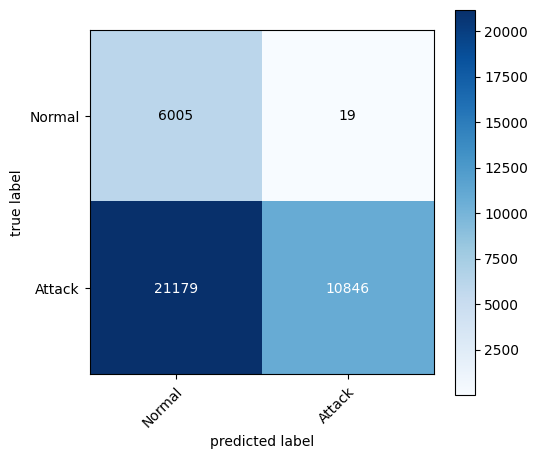

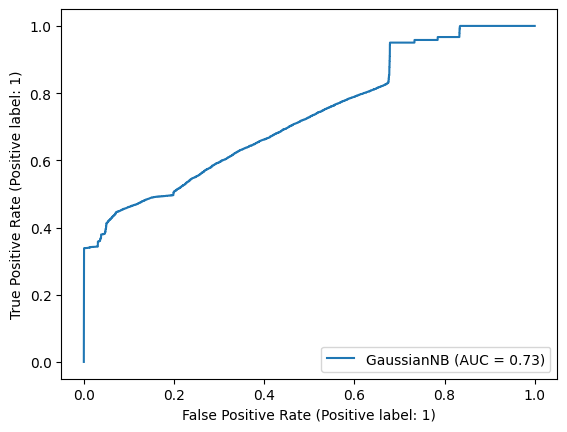

In [ ]:
# Evaluate the Naive Bayes Classifier
Evaluate('Naive Bayes Classifier', NB, X_test, Y_test)

## Linear Discriminant Analysis (LDA)

In [ ]:
# Instantiate the LDA model
LDA = LinearDiscriminantAnalysis(solver='lsqr')
LDA.fit(X_train, Y_train)

LinearDiscriminantAnalysis(solver='lsqr')

In [ ]:
# Print the training and testing scores
print("Linear Discriminant Analysis Training Score:", LDA.score(X_train, Y_train))
print("Linear Discriminant Analysis Testing Score:", LDA.score(X_test, Y_test))

Linear Discriminant Analysis Training Score: 0.889475851314533
Linear Discriminant Analysis Testing Score: 0.8879339798680649


--------------------------------------------------

The Linear Discriminant Analysis Model Accuracy   = 0.888

The Linear Discriminant Analysis Model Sensitvity = 1.0

The Linear Discriminant Analysis Model Precision  = 0.883

The Linear Discriminant Analysis Model F1 Score   = 0.938

The Linear Discriminant Analysis Model Recall     = 1.0

--------------------------------------------------



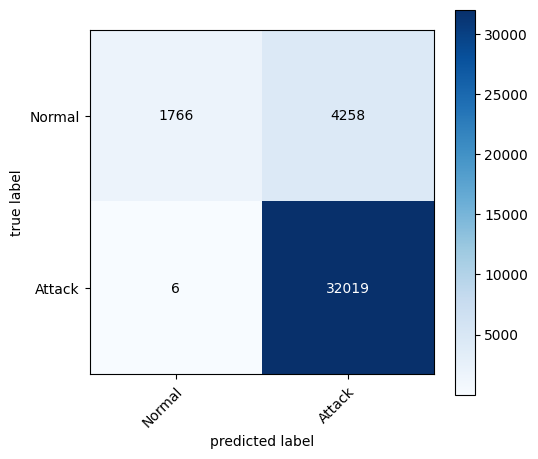

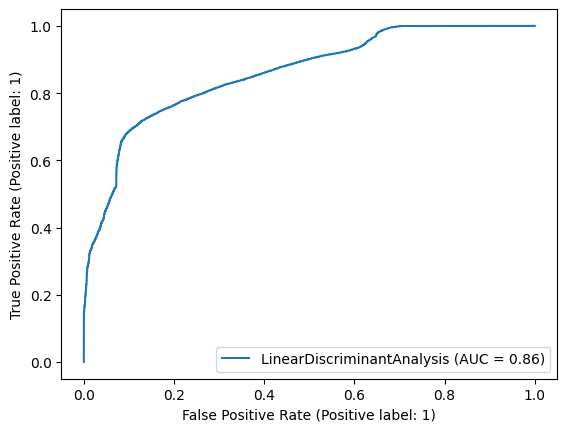

In [ ]:
# Evaluate the LDA model
Evaluate('Linear Discriminant Analysis', LDA, X_test, Y_test)


## Quadratic Discriminant Analysis (QDA)

In [ ]:
# Instantiate the QDA model
QDA = QuadraticDiscriminantAnalysis(reg_param=0.1)
QDA.fit(X_train, Y_train)

QuadraticDiscriminantAnalysis(reg_param=0.1)

In [ ]:
# Print the training and testing scores
print("Quadratic Discriminant Analysis Training Score:", QDA.score(X_train, Y_train))
print("Quadratic Discriminant Analysis Testing Score:", QDA.score(X_test, Y_test))


Quadratic Discriminant Analysis Training Score: 0.4691056269547163
Quadratic Discriminant Analysis Testing Score: 0.4710504875292386


## Passive Aggressive Classifier

In [ ]:
# Instantiate the Passive Aggressive Classifier
PAC = PassiveAggressiveClassifier(C=0.1, max_iter=1000)
PAC.fit(X_train, Y_train)

PassiveAggressiveClassifier(C=0.1)

In [ ]:
# Print the training and testing scores
print("Passive Aggressive Classifier Training Score:", PAC.score(X_train, Y_train))
print("Passive Aggressive Classifier Testing Score:", PAC.score(X_test, Y_test))


Passive Aggressive Classifier Training Score: 0.8641663819460871
Passive Aggressive Classifier Testing Score: 0.8616783621120134


--------------------------------------------------

The Passive Aggressive Classifier Model Accuracy   = 0.862

The Passive Aggressive Classifier Model Sensitvity = 0.966

The Passive Aggressive Classifier Model Precision  = 0.881

The Passive Aggressive Classifier Model F1 Score   = 0.922

The Passive Aggressive Classifier Model Recall     = 0.966

--------------------------------------------------



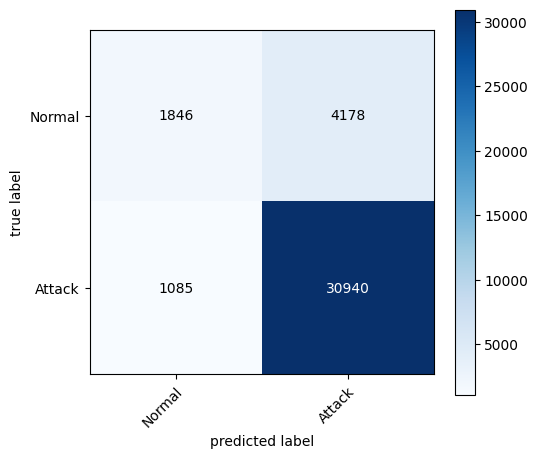

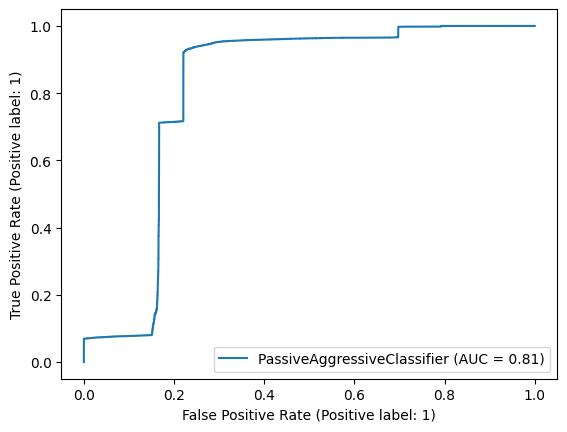

In [ ]:
# Evaluate the Passive Aggressive Classifier
Evaluate('Passive Aggressive Classifier', PAC, X_test, Y_test)

## AdaBoost Classifier

In [ ]:
# Instantiate the base estimator (DecisionTreeClassifier)
base_estimator = DecisionTreeClassifier(max_features=6, max_depth=4)

# Instantiate the AdaBoost Classifier with adjusted parameters
AdaBoost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, learning_rate=1.0)
AdaBoost.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                         max_features=6),
                   n_estimators=100)

In [ ]:
# Print the training and testing scores
print("AdaBoost Classifier Training Score:", AdaBoost.score(X_train, Y_train))
print("AdaBoost Classifier Testing Score:", AdaBoost.score(X_test, Y_test))

AdaBoost Classifier Training Score: 1.0
AdaBoost Classifier Testing Score: 1.0


--------------------------------------------------

The AdaBoost Classifier Model Accuracy   = 1.0

The AdaBoost Classifier Model Sensitvity = 1.0

The AdaBoost Classifier Model Precision  = 1.0

The AdaBoost Classifier Model F1 Score   = 1.0

The AdaBoost Classifier Model Recall     = 1.0

--------------------------------------------------



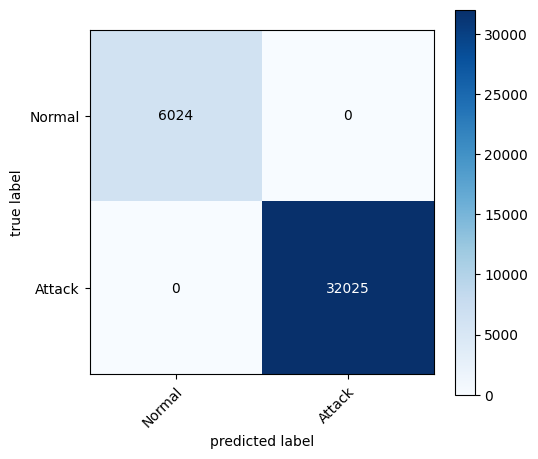

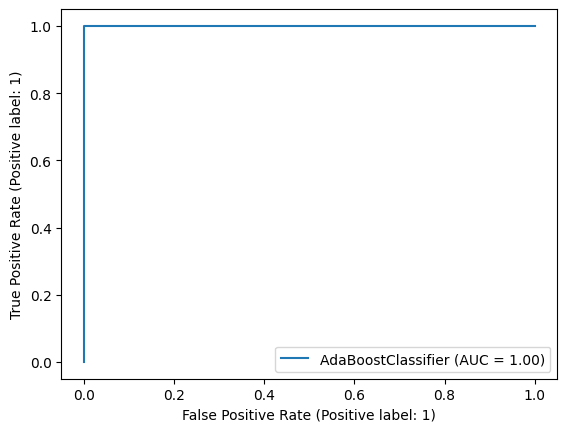

In [ ]:
# Evaluate the AdaBoost Classifier
Evaluate('AdaBoost Classifier', AdaBoost, X_test, Y_test)